# 半徑鄰近演算法回歸(Radius Neighbor Regression)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import random
import matplotlib.pyplot as plt

# Training Data

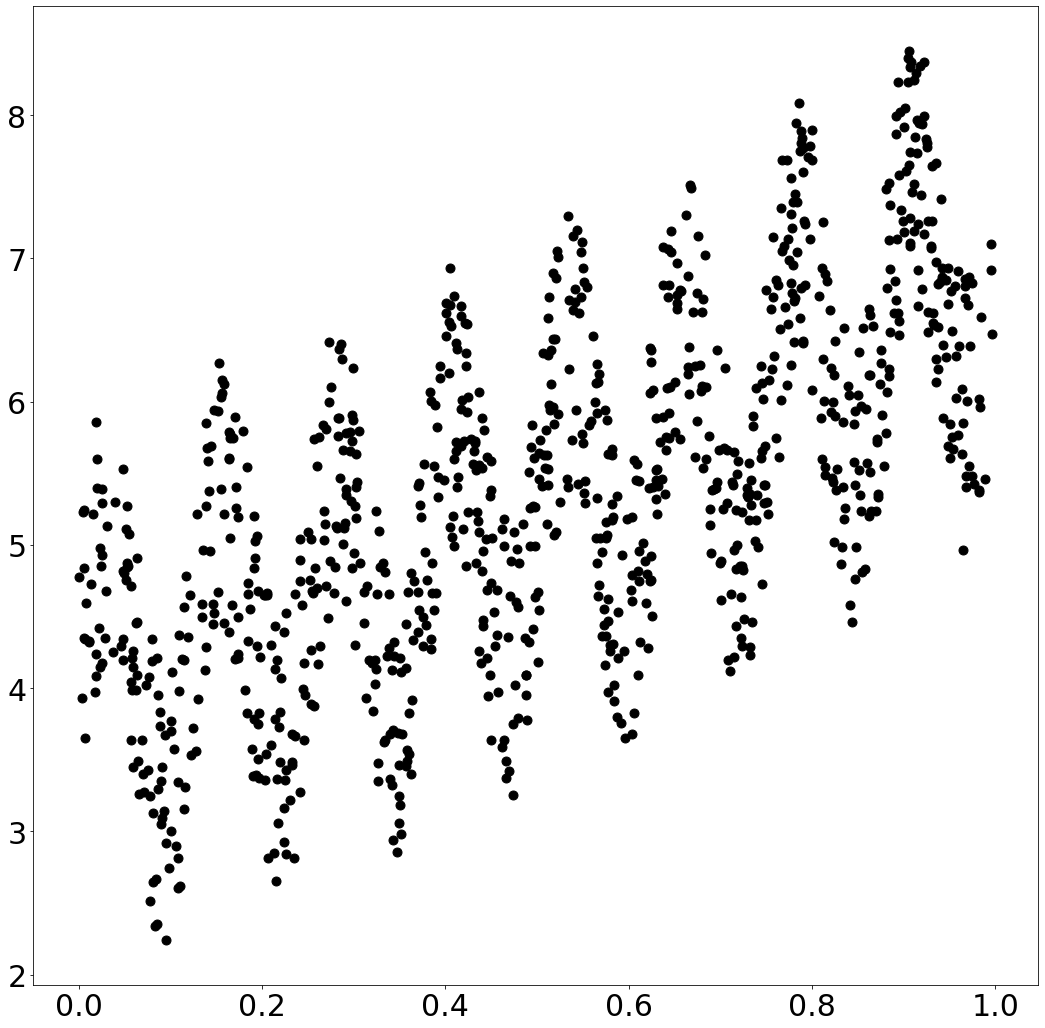

In [2]:
"""
產生我們的訓練集資料
這裡我們使用二次函數+sin函數
"""
N=1000
p2,p1,p0=1,2,3
x=np.zeros(N)
y=np.zeros(N)
for i in range(0,len(x)):
    x[i]+=random.random()
    y[i]+=random.random()*2
power=[p2,p1,p0]
for i in range(0,len(power)):
    y+=power[len(power)-i-1]*(x**i)
y+=np.sin(x*50)
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x,y,"ko",markersize=9)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# 計算各個數據間距

In [3]:
N=len(y)
ED=np.zeros((N,N))
for i in range(0,N):
    temp=np.ones(N)*x[i]
    ED[i,:]=np.sqrt((temp-x)**2)
h=0.0001
xx=np.arange(min(x),max(x),h)
Plot_ED=np.zeros((len(xx),N))
for i in range(0,len(xx)):
    temp=np.ones(N)*xx[i]
    Plot_ED[i,:]=np.sqrt((temp-x)**2)

# RaN Regressor

In [4]:
def RaN(ED,Plot_ED,xx,y,r):
    N=len(y)
    y_train=np.zeros(N)
    for i in range(0,N):
        ED_single=ED[i,:]
        Candid=np.array(np.where(ED_single<r)).flatten()
        y_train[i]=sum(y[Candid])/len(Candid)
    y_plot=np.zeros(len(xx))
    for i in range(0,len(xx)):
        Plot_ED_single=Plot_ED[i,:]
        Candid=np.array(np.where(Plot_ED_single<r)).flatten()
        if(Candid.size==0):
            y_plot[i]=y_train[np.argsort(Plot_ED_single)[0]]
        else:
            y_plot[i]=sum(y_train[Candid])/len(Candid)
    plt.plot(xx,y_plot,linewidth=2,label="RaN (k="+str(r)+")")

# PLOT

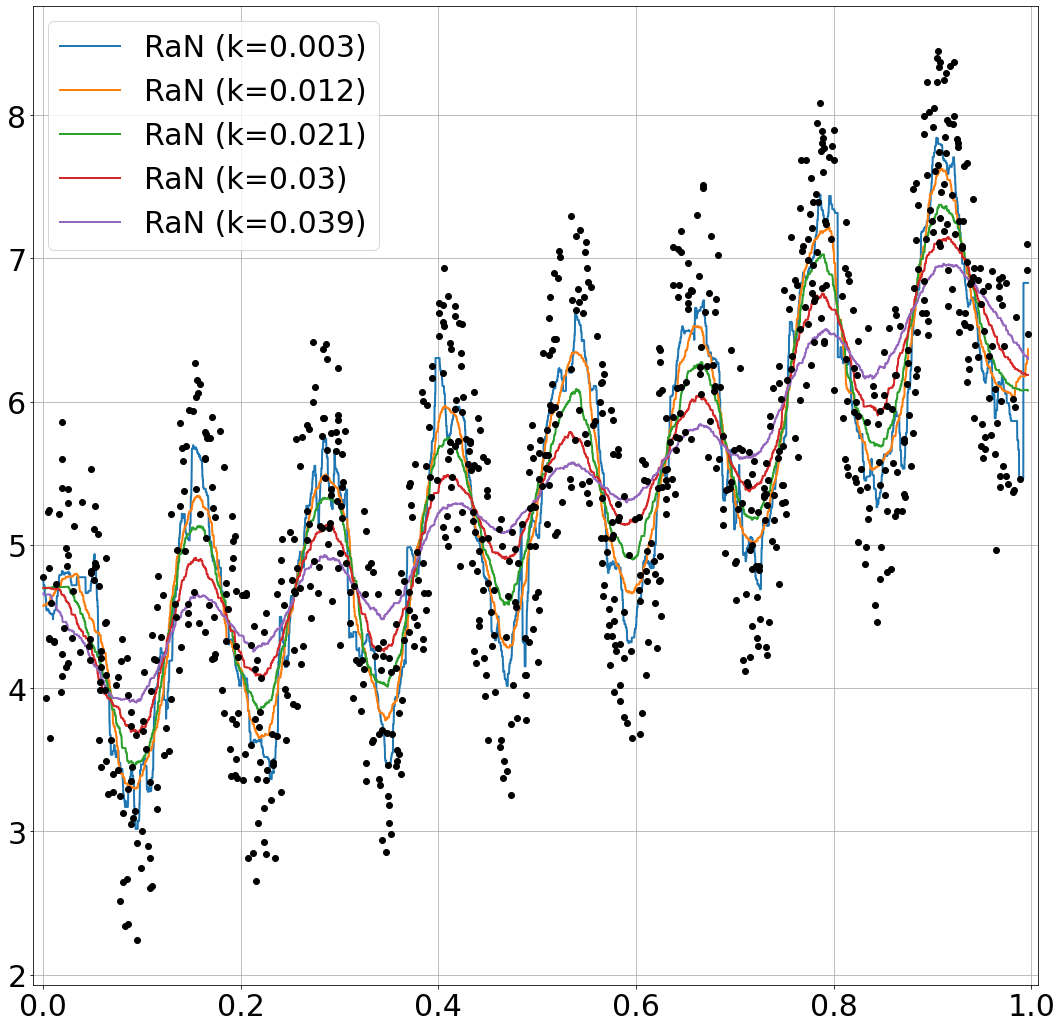

In [5]:
plt.rcParams["figure.figsize"] = (18,18)
for r in range(0,5):
    RaN(ED,Plot_ED,xx,y,round(0.009*r+0.003,3))
plt.plot(x,y,"ko")
plt.grid()
plt.legend(loc="upper left",fontsize=30)
plt.xlim(min(x)-0.01,max(x)+0.01)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()